### Import modules

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Initialize parameters

In [4]:
def initialize_parameters(n):
    w = np.zeros(n,)
    b = 0.0
    return w,b

### Predictor/Hypothesis

In [5]:
def predictor(x, w, b):
    return np.dot(x,w) + b

### Cost function

In [6]:
def calculate_cost(X, y, W, b):
    m = len(y)
    predictions = np.dot(X, W)
    error = predictions - y
    cost = 1/(2*m) * np.sum(np.power(error,2))
    return cost

### Gradient Descent

In [7]:
def gradient_descent(X, W, b, y, learning_rate = 0.0001, epochs = 25, print_interval = 1):

    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = predictor(X, W, b)
        error = predictions - y
        derivate = np.dot(error, X)
        actual_cost = calculate_cost(X, y, W, b)
        cost_history.append(actual_cost)
        
#         if (epoch % print_interval == 0):
#             print(f"Epoch : {epoch}")
#             print(f"MSE : {actual_cost}")
                
        W = W - (learning_rate/m) * derivate
        b = b - (learning_rate/m) * error.sum()
    
    return W, b, cost_history

### Run model

In [8]:
# Load dataset
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target


# Split dataset
X = data.drop(columns=['PRICE']).values
Y = data['PRICE'].values
W, b = initialize_parameters(X.shape[1])
W, b, cost_history = gradient_descent(X, W, b, Y, learning_rate=0.000005, epochs=1000000, print_interval=100000)

Epoch : 0
MSE : 296.0734584980237
Epoch : 100000
MSE : 18.167201226077015
Epoch : 200000
MSE : 15.390509260364105
Epoch : 300000
MSE : 13.95201977735776
Epoch : 400000
MSE : 13.20846862073576
Epoch : 500000
MSE : 12.826693917651905
Epoch : 600000
MSE : 12.633555060709215
Epoch : 700000
MSE : 12.538977450296072
Epoch : 800000
MSE : 12.496086386375874
Epoch : 900000
MSE : 12.480493733461705


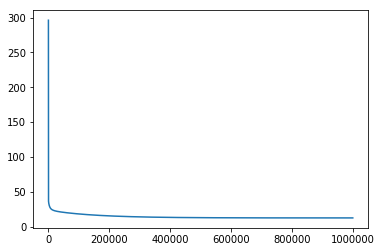

In [10]:
plt.plot(cost_history)

### Compare accuracy - sklearn

In [14]:
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
            6.32600000e+00, 5.25000000e+01, 4.35490000e+00,     4.00000000e+00, 2.77000000e+02,
            1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

test_predict_custom = predictor(sample_house, W, b)

model = LinearRegression()
model.fit(X, Y)
test_predict_sklearn = model.predict(sample_house)

print(f"Python implementation : {test_predict_custom}")
print(f"Sklearn implementation : {test_predict_sklearn}")

Python implementation : [23.58413807]
Sklearn implementation : [23.68284712]
